# Analyzing Star Wars Fan Surveys
While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular they wanted to know if the rest of America thinks that "The Empire Strikes Back" is the best of the bunch. So they began to collect data addressing this question. To do this, they surveyed Star Wars fans using SurveyMonkey, an online tool. They received 835 total responses, which are available for download from their github repository.

For this project, I will clean and explore the dataset. This dataset has several columns including the following:
- RespondentID — An anonymized ID for the respondent (person taking the survey)
- Gender — the respondent's gender
- Age — the respondent's age
- Household Income — the respondent's income
- Education — the respondent's education level
- Location (Census Region) — the respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? — a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? — a Yes or No response

There are also several other columsn containing answers to questions about the Star Wars movies. For some of the questions, respondents had to check one or more boxes which is difficult to represent in a column

## Getting Started
I want to start by reading in the dataset into a Dataframe and looking for any strange values in the columns and rows. 

In [36]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [37]:
# review column names
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

From what I see above, the questions asked ranged from simple "Have you seen any star wars movies?" to more obscure questions such as "Which character shot first?" There are also quite a few columns named "Unnamed: " followed by a number as well.

## Converting Values to Boolean
To start off, I want to clean the first two columns:
- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

Since both of these questions take yes or no response, they can be converted to boolean values to make it easier to work with.


In [38]:
# dictionary for mapping each value to a new one
yes_no = {
    'Yes': True,
    'No': False
}

# column names
cols = ['Have you seen any of the 6 films in the Star Wars franchise?', 
       'Do you consider yourself to be a fan of the Star Wars film franchise?']
for c in cols:
    star_wars[c] = star_wars[c].map(yes_no)
    
# verify change
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Cleaning the "Which have you seen" Columns
Next I would like to clean the "Which have you seen?" columns. The respondents checked off a series of boxes to indicate which movies from the franchise they have seen. Those columns are represented as:
- Which of the following Star Wars films have you seen? Please select all that apply. — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- Unnamed: 4 — whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- Unnamed: 5 — whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- Unnamed: 6 — whether or not the respondent saw Star Wars: Episode IV A New Hope.
- Unnamed: 7 — whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- Unnamed: 8 — whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, the value in a cell is the name of the movie, this indicates the respondent saw the movie. If the value is Nan, the respondent either didn't answer or didn't see the movie. So I'll assume that they didn't see the movie. I want to convert each of these columns to a Boolean, then rename them to something more intuitive.

In [39]:
# mapping dictionary 
seen_bool = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}

seen_cols = star_wars.columns[3:9]

# convert answers to bool
for c in seen_cols:
    star_wars[c] = star_wars[c].map(seen_bool)
    
# dictionary for new column names
new_cols = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6'
}
# renaming columns
star_wars = star_wars.rename(columns = new_cols)

# verify
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Ranking the Fan Favorites
The next six columns ask the respondent to rank the star wars movies in order from least to most favorite. 1 equals most favorite and 6 means leat favorite. Each of the following columns can contain the value 1,2,3,4,5,6 or NaN:
- Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  How much the respondent liked Star Wars: Episode I The Phantom Menace
- Unnamed: 10 — How much the respondent liked Star Wars: Episode II Attack of the Clones
- Unnamed: 11 — How much the respondent liked Star Wars: Episode III Revenge of the Sith
- Unnamed: 12 — How much the respondent liked Star Wars: Episode IV A New Hope
- Unnamed: 13 — How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- Unnamed: 14 — How much the respondent liked Star Wars: Episode VI Return of the Jedi

I want to convert each column to a numeric type and rename them so that you can easily tell what each column represents

In [40]:
# convert columns to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# dictionary for new column names
new_rank_col = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
}

# rename columns
star_wars = star_wars.rename(columns = new_rank_col)

# verify changes
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Finding the Highest Ranked Movie
Now that I've cleaned up the ranking columns, it'll be easier to find the highest ranked movie in the series. I'll take the average value of each movie column to come up with their individual rankings. Since 1 represents the most favorite, the lower the ranking, the better. Then I will be able to graph these rankings to better convey the information

In [41]:
# find averages
rank_columns = star_wars.columns[9:15]
avg = star_wars[rank_columns].mean()
print(avg)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


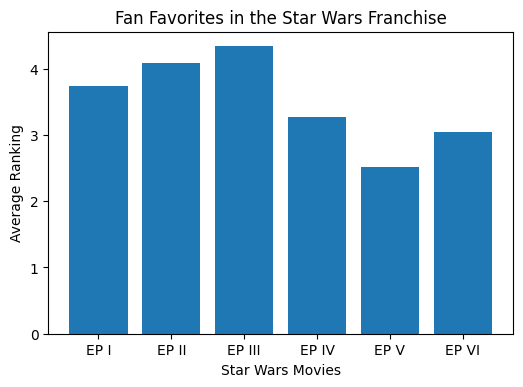

In [42]:
# show plots in notebook
%matplotlib inline

names = ['EP I', 'EP II', 'EP III', 'EP IV', 'EP V', 'EP VI']
plt.bar(names, avg)
plt.title('Fan Favorites in the Star Wars Franchise')
plt.xlabel('Star Wars Movies')
plt.ylabel('Average Ranking')
plt.show()

Based on this bar chart, Episode 5 is the fan favorite followed closely by Episode 6. Also its important to note that the original trilogy (Episodes 4-6) are more popular than the second trilogy.

## Analyzing Movie Watchers
Earlier in this project, I cleaned up the seen columns and converted their values to Boolean types. Now I want to figure out how many people have seen each movie by taking the sum of the column.

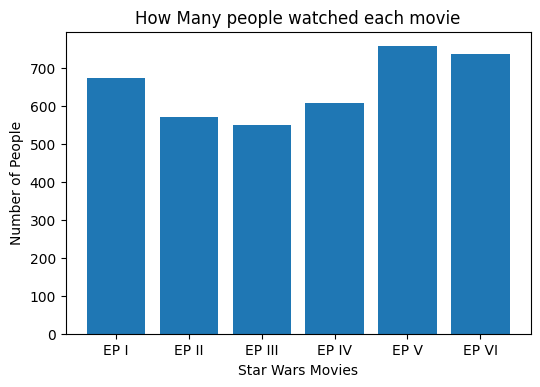

In [43]:
# get sums of each movie seen
seen_columns = star_wars.columns[3:9]
total_seen = star_wars[seen_columns].sum()

# plot bar chart
plt.bar(names, total_seen)
plt.title('How Many people watched each movie')
plt.xlabel('Star Wars Movies')
plt.ylabel('Number of People')
plt.show()

Just like in the previous chart, the original trilogy (Episodes 4-6) had more viewers compared with the second trilogy (Episodes 1-3). With Episode 5 having the most viewers closely followed by episode 6.

## Analyzing Rankings by Gender
Now that we know which movies the survey population as a whole has ranked the highest. I want to examine how certain segments of the survey population respopnded. There are several columns that segement our data into two groups like:
- Do you consider yourself to be a fan of the Star Wars film franchise? — True or False
- Do you consider yourself to be a fan of the Star Trek franchise? — Yes or No
- Gender — Male or Female

I want to split the Dataframe into two groups based on the Gender column and see what the most viewed and highly ranked movies are for the two groups.

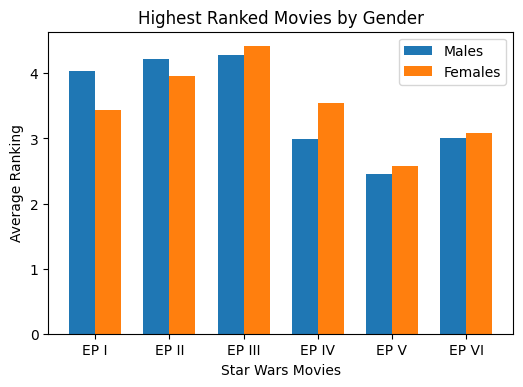

In [48]:
# split into male and female dataframes
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

# calculate rankings for both genders
male_avg = males[rank_columns].mean()
female_avg = females[rank_columns].mean()

# number of bars to show on graph
ind = np.arange(len(names))

# plot bar chart
width = 0.35
plt.bar(ind, male_avg, width, label='Males')
plt.bar(ind+width, female_avg, width, label='Females')
plt.xticks(ind+width/2, names)
plt.title('Highest Ranked Movies by Gender')
plt.xlabel('Star Wars Movies')
plt.ylabel('Average Ranking')
plt.legend(loc='best')
plt.show()

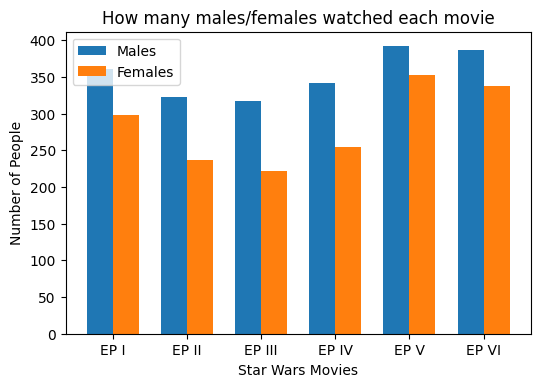

In [49]:
# calculate total views for each gender
males_total_seen = males[seen_columns].sum()
females_total_seen = females[seen_columns].sum()

# plot chart
width = 0.35
plt.bar(ind, males_total_seen, width, label="Males")
plt.bar(ind+width, females_total_seen, width, label="Females")
plt.xticks(ind+width / 2, names)
plt.title("How many males/females watched each movie")
plt.xlabel("Star Wars Movies")
plt.ylabel("Number of People")
plt.legend(loc="best")
plt.show()

# Final Conclusions
So from the above analysis, I've concluded that most fans disagree with the premise that Episode 4 is the best film in the franchise. In fact overwhelming Episode 5 outranked every episode in both highest rankings and most watched. When it was split between gender, less females overall have seen each film in the franchise. Regardless of gender the original trilogy was watched more and ranked better than the second trilogy.

## Potential Next Steps
There are several ways I could explore this data more:
- Try to segment the data based on columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are there any interesting patterns?
- Clean columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
    - Which character do respondents like the most?
    - Which character do respondents dislike the most?
 Which character is the most controversial (split between likes and dislikes)?